## Question 2

We can use self organizing maps as a substitute for K-means.

In Assignment 2, Question 2, K-means was used to compute the number of hidden layer neurons to be used in an RBF network. Using a 2D self-organizing map compare the clusters when compared to K-means for the MNIST data. Sample the data to include only images of '1' and '5'. Use the scikit-learn utilities to load the data. You are expected to (a) document the dimensions of the SOM computed and the learning parameters used to generate it (b) provide 2D plots of the regions for '1' and '5' for both the SOM and K-means solutions. You may project your K-means data using SVD to 2 dimensions for display purposes.

### Setup

The first thing we'll do is pull in the mnist dataset, and filter out specifically 1's and 5's.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from minisom import MiniSom
from random import shuffle

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='.cache')
t = mnist.target.tolist()

def partition(label):
    return [(x, label) for x in mnist.data[t.index(label) : t.index(label + 1)]]

In [4]:
ones = partition(1)
fives = partition(5)

dataset = ones + fives
shuffle(dataset)

#### Self Organizing Map

We'll initialize a SOM with the following properties:

In [5]:
x_dim = 20
y_dim = 20
input_len = 784
sigma = .9
learning_rate = .25

som = MiniSom(x_dim, y_dim, input_len, sigma=sigma, learning_rate=learning_rate)

We'll then perform train random over 1500 epochs.  

In [6]:
epochs = 1500
som.train_random([i[0] for i in dataset], epochs)

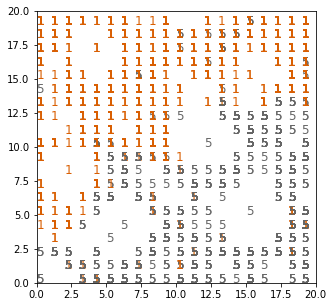

In [25]:
plt.figure(figsize=(5, 5))
winners = {}

for index, item in enumerate(dataset):
    image, label = item
    i, j = som.winner(image)
    winners[i,j] = index
    plt.text(i, j, str(label), color=plt.cm.Dark2(label / 5.), fontdict={'size': 12})
plt.axis([0, som.get_weights().shape[0], 0, som.get_weights().shape[1]])
plt.show()

####  KMeans 

PCA allows dimensionality reduction using SVD (Singular Value Decomposition). This allows us to project the data into a lower dimensional space (i.e 2d)

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

rd = PCA(n_components=2).fit_transform([scale(x[0]) for x in dataset[:1024]])
kmeans = KMeans(n_clusters=2)
kmeans.fit(rd)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

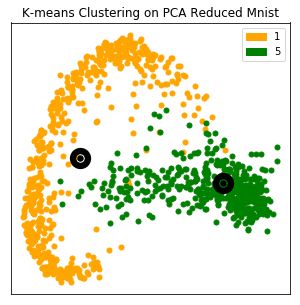

In [23]:
f = plt.figure(figsize=(5, 5))

legend = []
for label, color in [(1, 'orange'), (5, 'green')]:    
    _ = np.array([rd[i] for i in range(1024) if dataset[i][1] is label])
    plt.plot(_[:, 0], _[:, 1], 'k.', markersize=10, color=color)
    legend.append(patches.Patch(color=color, label=str(label)))

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=40, linewidths=15,
            color='black', zorder=10)

plt.title('K-means Clustering on PCA Reduced Mnist')
plt.legend(handles=legend)
plt.xticks([])
plt.yticks([])
plt.show()